In [1]:
import pandas as pd
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


In [14]:
dataset = pd.read_csv('../input/Iris.csv')
dataset.columns

Index([u'Id', u'SepalLengthCm', u'SepalWidthCm', u'PetalLengthCm',
       u'PetalWidthCm', u'Species'],
      dtype='object')

In [15]:
dataset.drop('Id', axis=1, inplace=True)

In [16]:
dataset.shape

(150, 5)

In [17]:
dataset.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [18]:
# class distribution
dataset.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [19]:
dataset.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

SepalLengthCm       Axes(0.125,0.547727;0.352273x0.352273)
SepalWidthCm     Axes(0.547727,0.547727;0.352273x0.352273)
PetalLengthCm          Axes(0.125,0.125;0.352273x0.352273)
PetalWidthCm        Axes(0.547727,0.125;0.352273x0.352273)
dtype: object

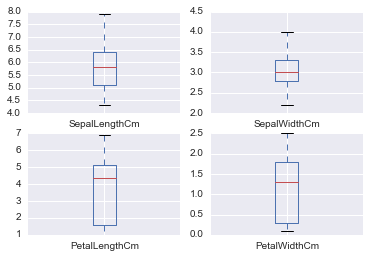

In [20]:
# Univariate plots
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)